-# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
The bar graph showed the Drug Regimen Campoline had max mice number,Zoniderol had min,by removing extra copy tootal unique values are 248.
By gender male are125,female 124.
-relation to mouse wt and tumore vol is 0.84,when the wt increase so does tumor.
-The regression analysis helped to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.
From the selected treatments Capomulin and Ramicane reduces the size of tumors better

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df=pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
#Check the number of mice
len(df["Mouse ID"].unique())

                     
                     
                     
                     
            

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=df.loc[df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
index_df = df.set_index('Mouse ID')
index_df.loc['g989']

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'].isin(duplicate_mouse)==False]
clean_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f'Number of mice after cleaning:',len(clean_df.groupby('Mouse ID').count()))
clean_df.head()

Number of mice after cleaning: 248


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor=clean_df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
  #calculating the mean
tumor_mean = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].rename('Mean')
    #calculate the median
tumor_median = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].rename('Median')
    #calculate variance
tumor_var = clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].rename('Variance')
     # calculate std
tumor_std = clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].rename('Standard_deviation')
    #calculate stand err
tumor_sem = clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].rename('Standard_error') 
                                                                   
    
# Assemble the resulting series into a single summary DataFrame.
results_df=pd.DataFrame({
                        'meam': tumor_mean,
                        'median': tumor_median,
                        'variance': tumor_var,
                        'std': tumor_std,
                        'sem': tumor_sem
                        })
print(results_df)

                   meam     median   variance       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


C:\Users\user\AppData\Local\Temp\ipykernel_11472\675712762.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].rename('Mean')
C:\Users\user\AppData\Local\Temp\ipykernel_11472\675712762.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_median = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].rename('Median')
C:\Users\user\AppData\Local\Temp\ipykernel_11472\675712762.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg_summary_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

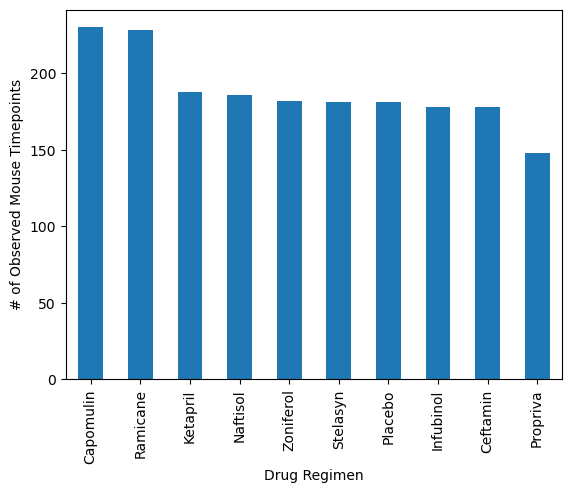

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Timepoints = clean_df['Drug Regimen'].value_counts()
Timepoints.plot(kind="bar")
plt.xlabel("Drug Regimen")                            
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()



<Axes: ylabel='Sex'>

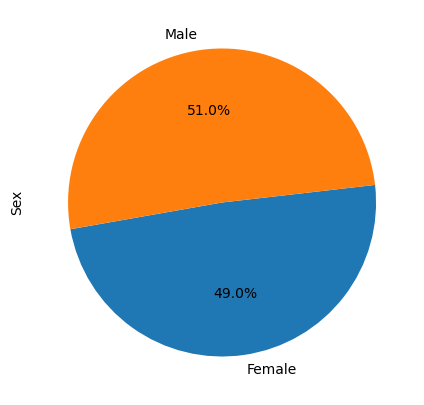

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df.groupby(['Sex'])['Sex'].count()
sex.plot.pie(startangle=190,autopct='%1.1f%%',figsize=(5,5))

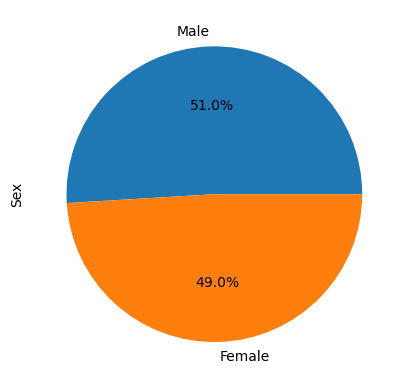

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Timepoints = clean_df.Sex.value_counts()
plt.pie(Timepoints.values,labels=Timepoints.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint 

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tx_df = pd.merge(max_timepoint , clean_df, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_list:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)'] 
    # add subset 
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
quartile = tumor_vol_list[0].quantile([.25,.5,.75])
lowerq = quartile[0.25]
upperq = quartile[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
print(f"{treatment}'s potential outliers: {outliers}")

Ceftamin's potential outliers: 3      62.999356
22     56.057749
25     55.742829
88     61.849023
94     68.923185
106    67.748662
107    57.918381
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
188    52.925348
209    67.527482
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64


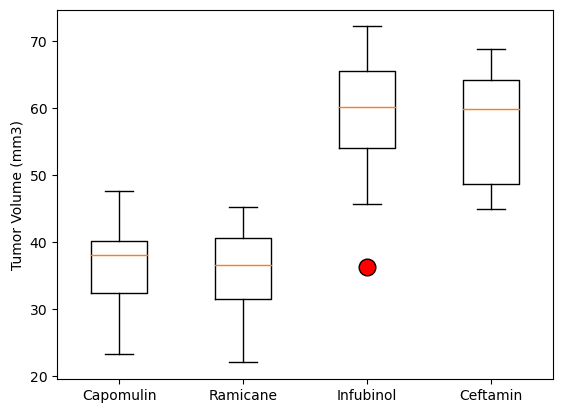

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_11472\489712304.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cap_group =cap_mice.groupby(["Mouse ID"]).mean()


Text(0, 0.5, 'Tumor Volume (mm3)')

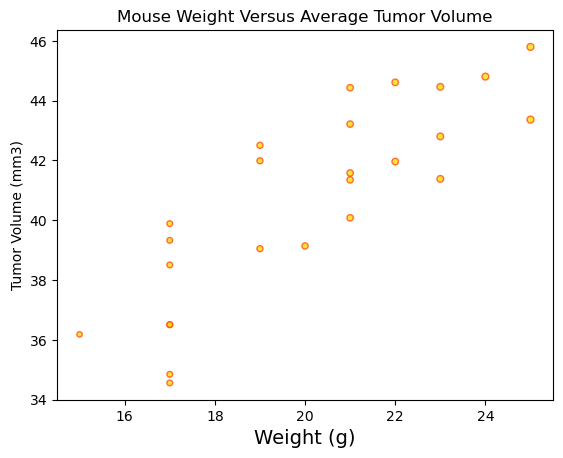

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regime
cap_group =cap_mice.groupby(["Mouse ID"]).mean()
cap_group.head()

#Get average tumor volumen
avg_tumor_vol = cap_group["Weight (g)"]
avg_weight = cap_group["Tumor Volume (mm3)"]

marker_size=15
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="gold", edgecolors="orangered",
            s=avg_tumor_vol, alpha=0.75)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)')
                                            


## Correlation and Regression

The r-squared is: (0.7088568047708723, 3)
y = 0.95x + 21.55


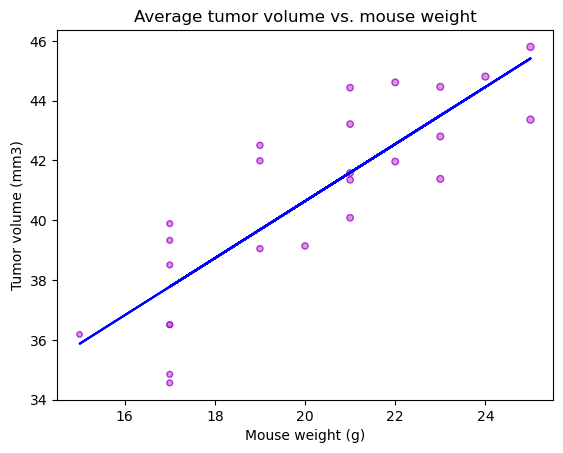

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Correlation = st.pearsonr(avg_tumor_vol,avg_weight)
(slope, intercept,rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept

#Use the same scatterplot made before 
#Change colors 
plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=avg_tumor_vol, alpha=0.75)
plt.plot(avg_tumor_vol,regress_values,"b-")


#Add title and labels to scatter plot 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2,3}")
print(line_eq)